In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns




In [3]:
dfseattle = pd.read_csv('../files/rent/seattle.csv')




In [ ]:
dfseattle['overall_satisfaction'] = dfseattle['overall_satisfaction'].fillna(dfseattle['overall_satisfaction'].mean())
dfseattle['bathrooms'] = dfseattle['bathrooms'].fillna(1)
dfseattle = dfseattle.drop(columns=['room_id','host_id','rate_type','currency','location','last_modified'], axis=1)


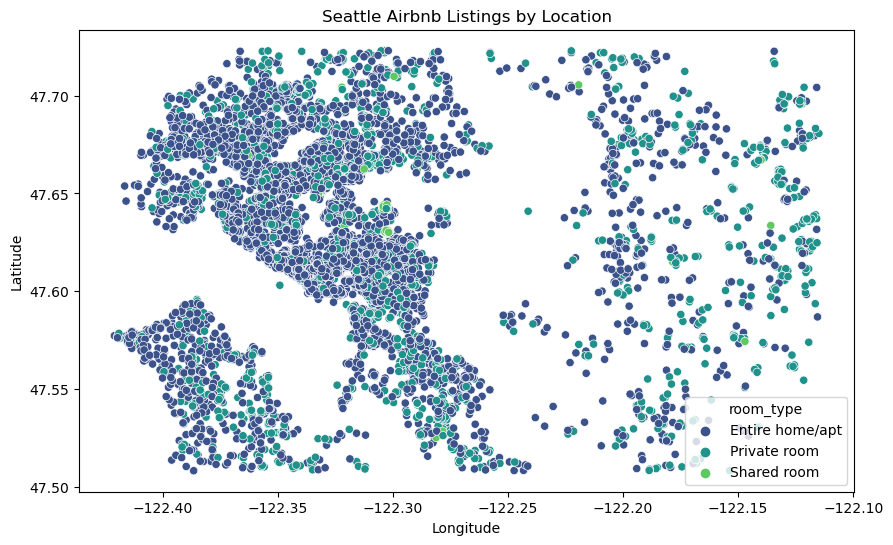

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfseattle, x='longitude', y='latitude', hue='room_type', palette='viridis')
plt.title("Seattle Airbnb Listings by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


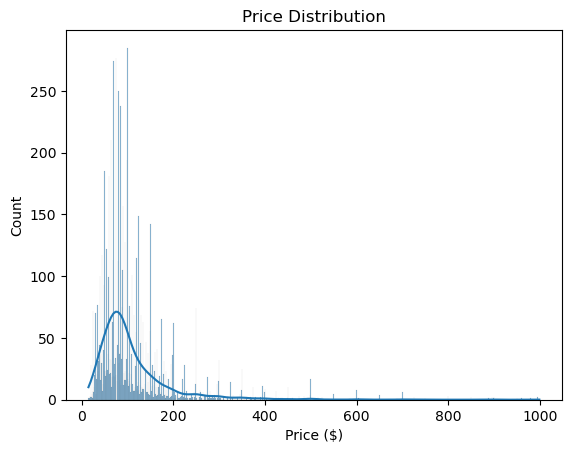

In [14]:
sns.histplot(dfseattle['price'], bins=1000, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.show()


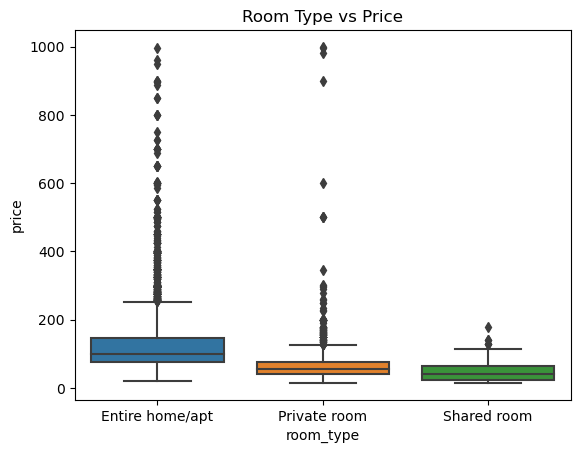

In [15]:
sns.boxplot(data=dfseattle, x='room_type', y='price')
plt.title("Room Type vs Price")
plt.show()


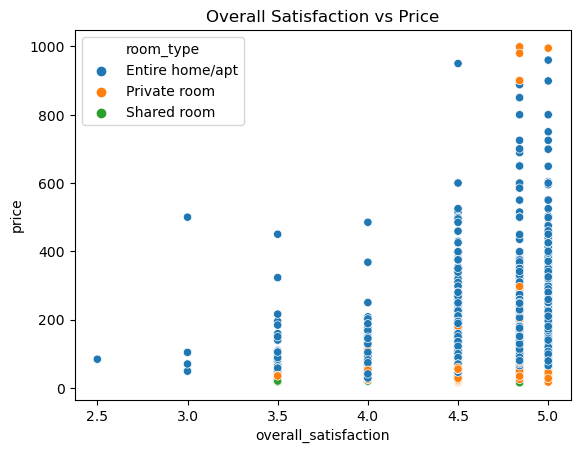

In [16]:
sns.scatterplot(data=dfseattle, x='overall_satisfaction', y='price', hue='room_type')
plt.title("Overall Satisfaction vs Price")
plt.show()


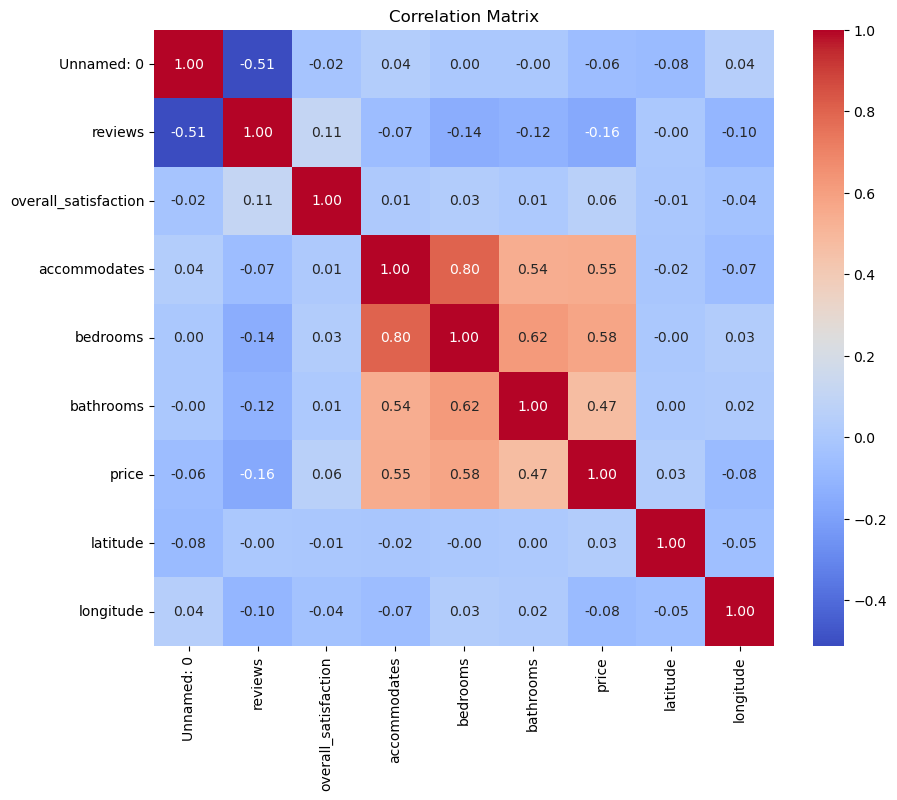

In [12]:

# Select only numerical columns
numeric_cols = dfseattle.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [17]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Remove rows with price greater than a threshold, e.g., $1000
dfseattle = dfseattle[dfseattle['price'] < 1000]


In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# 1. Remove price outlier ($6000)
df = dfseattle

# 2. Select features and target
features = df[['accommodates', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 'room_type']]
target = df['price']

# 3. One-hot encode room_type
features = pd.get_dummies(features, columns=['room_type'], drop_first=True)

# 4. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 5. Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)



gbr.fit(X_train, y_train_log)

# 6. Predict and evaluate
predictions = gbr.predict(X_test)
preds = np.expm1(predictions)  # revert log1p

# ✅ Compare with actual prices (not log values)
mae = mean_absolute_error(y_test, preds)
print(f"🎯 Mean Absolute Error (after log fix): ${mae:.2f}")


🎯 Mean Absolute Error (after log fix): $35.81


In [29]:
dfseattle = dfseattlem

In [31]:
dfseattle

,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,latitude,longitude,name
0,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,47.687801,-122.313427,Sunrise in Seattle Master Suite
1,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,47.523980,-122.359891,"Cozy Studio, min. to downtown -WiFi"
2,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,47.654109,-122.337605,"Fab, private seattle urban cottage!"
3,Private room,"Seattle, WA, United States",130,4.5,2,1.0,3.0,65,47.550167,-122.319366,Glorious sun room w/ memory foambed
4,Private room,"Seattle, WA, United States",401,5.0,2,1.0,1.0,78,47.608010,-122.328739,Downtown/Convention Ctr B&B - Nice!
...,...,...,...,...,...,...,...,...,...,...,...
6094,Entire home/apt,"Seattle, WA, United States",4,5.0,6,3.0,2.0,69,47.612462,-122.302449,3 Bedroom Urban Oasis
6095,Entire home/apt,"Seattle, WA, United States",3,5.0,6,2.0,2.5,140,47.605606,-122.314648,City oasis in the heart of the Capitol Hill
6096,Entire home/apt,"Seattle, WA, United States",3,4.0,2,1.0,1.0,41,47.693665,-122.345505,"Georgian Properties ""5"""
6097,Entire home/apt,"Seattle, WA, United States",6,5.0,2,1.0,1.0,65,47.533054,-122.352588,Cute and Comfortable Guest Suite


In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans

# Load your DataFrame (assumes it's already loaded as dfseattle)
df = dfseattle.copy()

# 🔍 Step 1: Drop outlier
df = df[df['price'] < 1000]

# 🔍 Step 2: Drop weak data points
df = df[(df['reviews'] > 3) & (df['bedrooms'] > 0) & (df['bathrooms'] > 0)]

# 🧠 Step 3: Feature Engineering
df['price_per_guest'] = df['price'] / df['accommodates'].replace(0, 1)

# 🗺️ Step 4: Location Clustering
# 🗺️ Step 4: Haversine Bucketing Instead of KMeans
df['lat_bucket'] = pd.cut(df['latitude'], bins=5, labels=False)
df['long_bucket'] = pd.cut(df['longitude'], bins=5, labels=False)
df['location_cluster'] = df['lat_bucket'] * 5 + df['long_bucket']



# ✅ Step 5: Prepare Features and Target
features = df[['accommodates', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 'room_type', 'price_per_guest', 'location_cluster']]
features = pd.get_dummies(features, columns=['room_type', 'location_cluster'], drop_first=True)

target = df['price']

# 🎯 Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 🔄 Step 7: Log Transform
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 🌲 Step 8: Model
gbr = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.85,
    random_state=42
)

gbr.fit(X_train, y_train_log)

# 📈 Step 9: Predict and Evaluate
predictions = gbr.predict(X_test)
preds = np.expm1(predictions)

mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"🎯 Final MAE: ${mae:.2f}")
print(f"📊 R² Score: {r2:.4f}")


🎯 Final MAE: $1.83
📊 R² Score: 0.9901


In [42]:
import joblib

joblib.dump(gbr, 'gbr_model_seattle.pkl')


['gbr_model_seattle.pkl']

In [5]:
dfseattle['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)